# Plotting an Audio File
For the transformation of the audio data to a numpy array the [soundfile](https://github.com/bastibe/SoundFile) library is used. It is based on [libsndfile](http://www.mega-nerd.com/libsndfile/) which is also used by Csound. Other Python modules like [wave](https://docs.python.org/3/library/wave.html) have problems in reading 24-bit files and are more complicated to use.

## Basic plotting

First load the dependencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

The most simple usage reads the file and calculates the time for the x-axis (otherwise this axis would show samples as units).

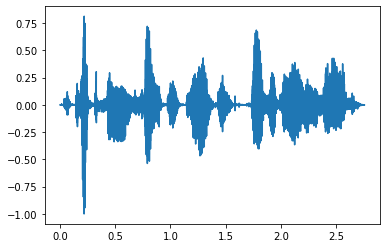

In [2]:
file = '../examples/fox.wav'
amps, sr = sf.read(file)
time = np.linspace(0, len(amps)/sr, num=len(amps))
plt.plot(time,amps)
plt.show()

## Plotting adjustments

We follow some settings in iCsound here for the same example.

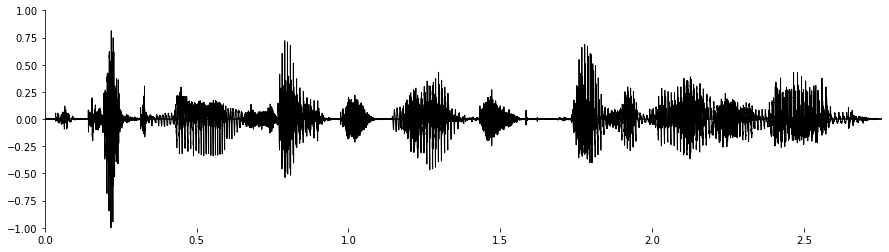

In [3]:
file = '../examples/fox.wav'
amps, sr = sf.read(file)
time = np.linspace(0, len(amps)/sr, num=len(amps))

fig,ax = plt.subplots(figsize=(15,4))
ax.hlines(0, 0, len(amps)/sr)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(0, len(amps)/sr)
ax.set_ylim(-1,1)
ax.plot(time,amps, color='black', lw=1)
plt.show()

## Wrap in a function
We add the options to show only a selection of the soundfile by specifying start and end in seconds, 

In [4]:
def plotSF(file, skip=0, end=-1, figsize=(15,4)):
    """Plots a sound file via Matplotlib.
    Requires matplotlib.pyplot as plt and
    the python soundfile library as sf.
    file = file name as string
    start = start in seconds to read in file
    end = end in seconds to read in file
    figsize = tuple as in matplotlib.pyplot.plot"""
    sr = sf.SoundFile(file).samplerate
    start = round(skip*sr)
    if end == -1: 
        stop = None
    else:
        stop = round(end*sr)
    amps, sr = sf.read(file,start=start, stop=stop)
    numframes = len(amps)
    endsecs = skip + numframes/sr
    time = np.linspace(skip, endsecs, numframes)
    fig,ax = plt.subplots(figsize=figsize)
    ax.hlines(0, skip, endsecs)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim(skip, endsecs)
    ax.set_ylim(-1,1)
    ax.plot(time,amps, color='black', lw=1)
    plt.show()

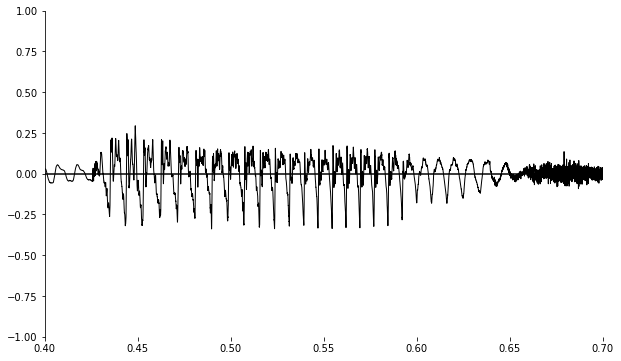

In [5]:
plotSF('../examples/fox.wav', skip=0.4, end=0.7, figsize=(10,6))

## Todo
Add stereo and multichannel versions.


written by joachim heintz, december 2019.